In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Instructions:
<br>
<br>
Gender split <br>
Training split - These can be skipped, unless one wants to pre process the data again. <br>
<br>
Loading data - Allways run. <br>
<br>
Linear Regression <br>
Random Forest - These can be ran independently.<br>
<br>
<br>
In addition: analyze_data_1D_loop.py can be used to compare the feature variables in 1D linear regression.
It produces a large number of figures, hence left as a separate script.

### Gender split:

In [2]:
# loading in the dataframe
data = pd.read_csv('parkinsons_updrs.csv')

t1 = data.head(5)
print(t1)

# Split the data to men and women:

dataM = data[data['sex'] == 0]
dataW = data[data['sex'] == 1]

# Number of samples per sex:
print(data.shape)
print(dataM.shape)
print(dataW.shape)
print('\n')

snum = dataM['subject#']
snum = snum.to_numpy()
patients = np.unique(snum)
NofMale = len(patients)
print('Male patients:')
print(NofMale)
print('\n')

snumW = dataW['subject#']
snumW = snumW.to_numpy()
patientsW = np.unique(snumW)
NofFemale = len(patientsW)
print('Female patients:')
print(NofFemale)

dataM.to_csv('datasets/dataM.csv', index=False)
dataW.to_csv('datasets/dataW.csv', index=False)


   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

### Train split:

Splitting the data into training, validating and test sets.

In [3]:
# Read unsplit data:
data = pd.read_csv("datasets/dataM.csv")


# Create random number generator with reproducible seed:
# Some random seed: 623137657648
rnd = np.random.default_rng(623137657648)


# Split dataset to 3 parts: training, validating, testing, based on
# subject number.

# First splitting the subject numbers:
snum = data["subject#"]
snum = snum.to_numpy()
print(snum)

patients = np.unique(snum)  # This is the list of unique subject numbers.
# Shuffle before splitting. This is because the original data may have some
# unwanted regularities such as:
# "The first 5 patients are from the same geographical region."
rnd.shuffle(patients)

ind_training_set = patients[0:12]
ind_validation_set = patients[12:20]
ind_test_set = patients[20:28]


# And now, splitting the actual data based on the split subject numbers:

empty_df = data.drop(range(0, 4008))
#print(data.shape)
#print(empty_df.shape)
training_data = empty_df
validating_data = empty_df
test_data = empty_df
# print(training_data)

for i in ind_training_set:
    training_data = pd.concat([training_data, data[data["subject#"] == i]])

for i in ind_validation_set:
    validating_data = pd.concat([validating_data, data[data["subject#"] == i]])

for i in ind_test_set:
    test_data = pd.concat([test_data, data[data["subject#"] == i]])


# tests:
'''
print('\n')
print(training_data.shape)
print(training_data)
print(validating_data.shape)
print(validating_data)
print(test_data.shape)
print(test_data)

print(data.shape)
'''


# Saving.
training_data.to_csv("datasets/training_data_M.csv", index=False)
validating_data.to_csv("datasets/validating_data_M.csv", index=False)
test_data.to_csv("datasets/test_data_M.csv", index=False)

[ 1  1  1 ... 42 42 42]


# Loading data

In [4]:
# Reading the datasets.
training_data = pd.read_csv('datasets/training_data_M.csv')
validation_data = pd.read_csv('datasets/validating_data_M.csv')
test_data = pd.read_csv('datasets/test_data_M.csv')


# get labels
y_train = training_data['total_UPDRS'].to_numpy()
y_val = validation_data['total_UPDRS'].to_numpy()
y_test = test_data['total_UPDRS'].to_numpy()

# LinearRegression

training std:
10.738233391069135
validating std:
9.230826352972711
test std:
12.717362478398902




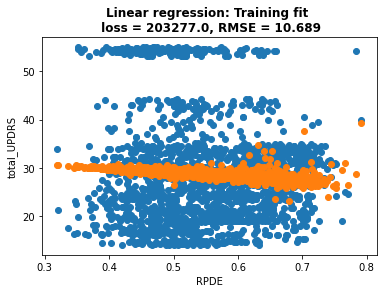

<Figure size 432x288 with 0 Axes>

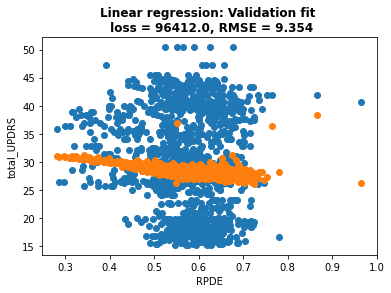

<Figure size 432x288 with 0 Axes>

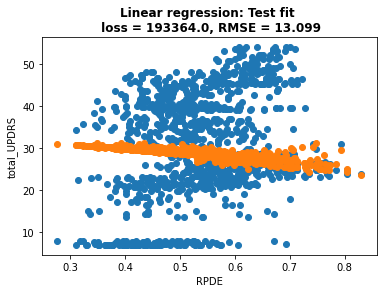

Comparison of different combinations feature variables:


                                            Features  Training error  \
4                              RPDE Jitter(Abs) NHR    203277.425534   
0                              RPDE Jitter(Abs) NHR    203277.425534   
1                                  RPDE Jitter(Abs)    204233.840486   
2        RPDE Jitter(Abs) NHR Jitter:RAP Jitter:DDP    200139.643046   
3  Jitter(%) Jitter(Abs) Jitter:RAP Jitter:PPQ5 J...   160811.296625   

   Training RMSE  Validation error  Validation RMSE     Test error  Test RMSE  
4      10.689481      96411.985424         9.353512  193364.053452  13.098631  
0      10.689481      96411.985424         9.353512  193364.053452  13.098631  
1      10.714598      97556.535342         9.408868            NaN        NaN  
2      10.606659     110048.407413         9.993120            NaN        NaN  
3       9.507587     248188.647836        15.007217            NaN        NaN  


<Figure size 432x288 with 0 Axes>

In [5]:
# Options:
feature_list = ['RPDE', 'Jitter(Abs)', 'NHR']#, 'Jitter:RAP', 'Jitter:DDP']
#['Jitter(%)', 'Jitter(Abs)',	'Jitter:RAP',	'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',	'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
#['RPDE', 'Jitter(Abs)', 'NHR', 'Jitter:RAP', 'Jitter:DDP']
want_to_save = False
save_to = 'results_multivar_output.csv'
feature_to_plot = 'RPDE' # Select one of the features for illustrative 1D plots.
#feature_list[0] 
want_to_test = True
want_save_figs = True
fig_folder = 'figs/multivar_tests'


# get labels
updrs = training_data['total_UPDRS'].to_numpy()
updrs_validt = validation_data['total_UPDRS'].to_numpy()
updrs_test = test_data['total_UPDRS'].to_numpy()


# get standard deviation (for comapring the errors)
sd_train = np.std(updrs)
sd_valid = np.std(updrs_validt)
sd_test = np.std(updrs_test)

print('training std:')
print(sd_train)
print('validating std:')
print(sd_valid)
print('test std:')
print(sd_test)
print('\n')


# loading save file:
result_df = pd.read_csv(save_to)

# get feature variables
Xt = training_data[feature_list].to_numpy()


# Training the linear regression model:

# Reshape to 2D arrays (LinearRegression() requires 2D input)
updrs = updrs.reshape(-1,1)

# Computing the fit and the prediction.
regObj = LinearRegression().fit(Xt, updrs)
pred_updrs = regObj.predict(Xt)


# Computing error:
loss_training = np.sum(np.square(updrs - pred_updrs))
diff_train = updrs - pred_updrs

# Calculating RMSE:
#N_valid = feature_validt.shape[0]
RMSE_train = np.sqrt(mean_squared_error(updrs, pred_updrs))


# Plotting the data:
x_plot = training_data[feature_to_plot]

figN = 1
fig1 = plt.figure(num=figN)
figN = figN + 1
ax1 = fig1.add_subplot()
ax1.scatter(x_plot, updrs)


# Plot the fit result:
ax1.scatter(x_plot, pred_updrs)

title_str = ''
for s in feature_list:
  title_str = title_str + s + ' '

ax1.set_xlabel(feature_to_plot)
ax1.set_ylabel('total_UPDRS')
#ax1.set_title('Training fit: ' + title_str)
ax1.set_title('Linear regression: Training fit \n loss = '
  + str(np.round(loss_training)) + ', RMSE = ' + str(np.round(RMSE_train, 3)),
   fontweight = 'bold')

plt.show(block=False)

if want_save_figs:
    plt.savefig(fig_folder + '/lin_reg_' + title_str + '_train.pdf', format='pdf')


# Validating:

# Feature variables for the validation set:
feature_validt = validation_data[feature_list].to_numpy()

# Reshape to 2D array. (LinearRegression() requires 2D input)
updrs_validt = updrs_validt.reshape(-1,1)

# Computing prediction for the validation data:
pred_updrs_validt = regObj.predict(feature_validt)

# Computing validation error:
loss_validation = np.sum(np.square(pred_updrs_validt - updrs_validt))

# Tests:
diff_validt = pred_updrs_validt - updrs_validt
#print(diff_validt[500:505])
'''
N_valid = feature_validt.shape[0]
print(N_valid)
RMSE = np.sqrt(loss_validation / N_valid)
print('RMSE:')
print(RMSE)
mean_error = np.sum(diff_validt) / N_valid
print('Mean error:')
print(mean_error)
'''
# Calculating validation RMSE:
N_valid = feature_validt.shape[0]
#RMSE_valid = np.sqrt(loss_validation / N_valid)
RMSE_valid = np.sqrt(mean_squared_error(updrs_validt, pred_updrs_validt))

# Plotting the walidation result:
x_plot_validt = validation_data[feature_to_plot]

fig2 = plt.figure(num=figN)
figN = figN + 1
ax2 = fig2.add_subplot()
ax2.scatter(x_plot_validt, updrs_validt)
ax2.scatter(x_plot_validt, pred_updrs_validt)


ax2.set_xlabel(feature_to_plot)
ax2.set_ylabel('total_UPDRS')
#ax2.set_title('Validation fit: ' + title_str)
ax2.set_title('Linear regression: Validation fit \n loss = '
  + str(np.round(loss_validation)) + ', RMSE = ' + str(np.round(RMSE_valid, 3)),
   fontweight = 'bold')

plt.show(block=False)

if want_save_figs:
    plt.savefig(fig_folder + '/lin_reg_' + title_str + '_val.pdf', format='pdf')



# Testing 

if want_to_test:
  # Feature variables for the test set:
  feature_test = test_data[feature_list].to_numpy()

  # Reshape to 2D array. (LinearRegression() requires 2D input)
  updrs_test = updrs_test.reshape(-1,1)

  # Computing prediction for the test data:
  pred_updrs_test = regObj.predict(feature_test)

  # Computing test error:
  loss_test = np.sum(np.square(pred_updrs_test - updrs_test))

  # Tests:
  diff_test = pred_updrs_validt - updrs_validt
  #print(diff_test[500:505])

  '''
  N_valid = feature_validt.shape[0]
  print(N_valid)
  RMSE = np.sqrt(loss_validation / N_valid)
  print('RMSE:')
  print(RMSE)
  mean_error = np.sum(diff_validt) / N_valid
  print('Mean error:')
  print(mean_error)
  '''
  
  # Calculating test RMSE:
  #N_test = feature_test.shape[0]
  RMSE_test = np.sqrt(mean_squared_error(updrs_test, pred_updrs_test))
  

  # Plotting the test result:
  x_plot_test = test_data[feature_to_plot]

  fig3 = plt.figure(num=figN)
  figN = figN + 1
  ax3 = fig3.add_subplot()
  ax3.scatter(x_plot_test, updrs_test)
  ax3.scatter(x_plot_test, pred_updrs_test)

  ax3.set_xlabel(feature_to_plot)
  ax3.set_ylabel('total_UPDRS')
  #ax3.set_title('Test fit: ' + title_str)
  ax3.set_title('Linear regression: Test fit \n loss = '
  + str(np.round(loss_test)) + ', RMSE = ' + str(np.round(RMSE_test, 3)),
   fontweight = 'bold')
  
  plt.show(block=False)
  
  if want_save_figs:
    plt.savefig(fig_folder + '/lin_reg_' + title_str + '_test.pdf', format='pdf')



# Collecting the results:
i = result_df.shape[0]
result_df.loc[i,'Features'] = title_str
result_df.loc[i,'Training error'] = loss_training
result_df.loc[i,'Training RMSE'] = RMSE_train
result_df.loc[i,'Validation error'] = loss_validation
result_df.loc[i,'Validation RMSE'] = RMSE_valid
if want_to_test:
  result_df.loc[i,'Test error'] = loss_test
  result_df.loc[i,'Test RMSE'] = RMSE_test

    
    
# Print results:
result_df = result_df.sort_values('Validation error')
print('Comparison of different combinations feature variables:')
print('\n')
print(result_df)
    
# Saving the results:    
if want_to_save:
  print('Saving')
  result_df.to_csv(save_to, index=False)
  

plt.show(block=True)

# Random Forest Regression

The  training  R-squared is: 0.94
rf training rmse:
2.6584736539158205
rf validation rmse:
10.567855304083997
rf training loss:
12573.050777876304
rf validation loss:
123070.881432318


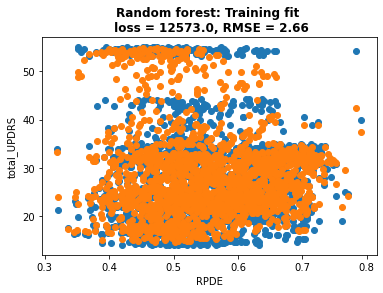

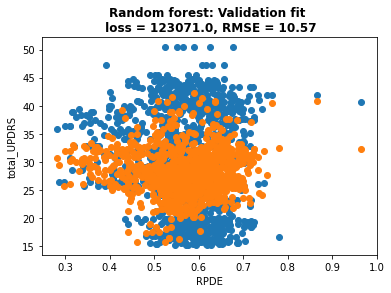

In [6]:
# Options:
feature_list = ['Jitter(%)', 'Jitter(Abs)',	'Jitter:RAP',	'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',	'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
feature_to_plot = 'RPDE'
want_save_figs = False
fig_folder = 'figs/rnd_forest'


# get feature variables
X_train = training_data[feature_list].to_numpy()
X_val = validation_data[feature_list].to_numpy()
X_test = test_data[feature_list].to_numpy()



# Random Forest Regression
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)



# Training model evaluation
print('The  training  R-squared is: %.2f'% rf_regr.score(X_train, y_train)) # The training R squared



# evaluate the trained RPR on both training set and validation set
y_pred_train = rf_regr.predict(X_train) # predict on the training set
rf_tr_error = np.sqrt(mean_squared_error(y_train, y_pred_train)) # calculate the training error
y_pred_val = rf_regr.predict(X_val) # predict values for the validation data 
rf_val_error = np.sqrt(mean_squared_error(y_val, y_pred_val)) # calculate the validation error

print('rf training rmse:')
print(rf_tr_error)
print('rf validation rmse:')
print(rf_val_error)



rf_tr_loss = np.sum(np.square(y_pred_train - y_train))
rf_val_loss = np.sum(np.square(y_pred_val - y_val))

print('rf training loss:')
print(rf_tr_loss)
print('rf validation loss:')
print(rf_val_loss)



# Plotting training results:
x_plot = training_data[feature_to_plot]

#figN2
fig4 = plt.figure()
#figN2 = figN2 + 1
ax4 = fig4.add_subplot()
ax4.scatter(x_plot, y_train)
ax4.scatter(x_plot, y_pred_train)

ax4.set_xlabel(feature_to_plot)
ax4.set_ylabel('total_UPDRS')
#ax4.set_title('Test fit: ' + title_str)
ax4.set_title('Random forest: Training fit \n loss = '
+ str(np.round(rf_tr_loss)) + ', RMSE = ' + str(np.round(rf_tr_error, 2)),
  fontweight = 'bold')

if want_save_figs:
  plt.savefig(fig_folder + '/rnd_forest_train.pdf', format='pdf')



# Plotting validating results:
x_plot = validation_data[feature_to_plot]

#figN2
fig5 = plt.figure()
#figN2 = figN2 + 1
ax5 = fig5.add_subplot()
ax5.scatter(x_plot, y_val)
ax5.scatter(x_plot, y_pred_val)

ax5.set_xlabel(feature_to_plot)
ax5.set_ylabel('total_UPDRS')
#ax4.set_title('Test fit: ' + title_str)
ax5.set_title('Random forest: Validation fit \n loss = '
+ str(np.round(rf_val_loss)) + ', RMSE = ' + str(np.round(rf_val_error, 2)),
  fontweight = 'bold')

if want_save_figs:
  plt.savefig(fig_folder + '/rnd_forest_val.pdf', format='pdf')

plt.show()


